# Spatial Distributions of SIC and PSL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import xarray as xr
import cftime
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4, h5netcdf, dask
from matplotlib import cm, colors

# custom package
from icepy.analysis import *
from icepy.splot import *

monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
            7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

# Open Datasets

In [3]:
method = 'mean'
daterange = (2000,2019) # for calculating anomalies
daterange_clim = (1992,2015) # for climatologies

mask = xr.open_dataset("~/sea_ice/data/masks/1x1/land2.nc")
#mask = mask.where(~np.isnan(mask.mask),other=0)

In [4]:
sic_path = "~/sea_ice/data/obs/Had2CIS/sic/1x1/td_hadisst2.2_cis_great_cmc_monthly_cdo360x180_195901_202412_sicn.nc"
psl_path = "~/sea_ice/data/obs/ERA5/psl/1x1/psl_Amon_ERA5_CanESM5grid_197901-201912.nc"

# open data
sic_Had2CIS = format_time_coord(xr.open_dataset(sic_path),'1959-01','2024-12',freq='M').where(~np.isnan(mask.mask))
psl_ERA5 = format_time_coord(xr.open_dataset(psl_path),'1979-01','2019-12',freq='M')
psl_ERA5['psl'] *= 1e-2     # Convert to hectopascals 
psl_ERA5['psl'] = psl_ERA5['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_Had2CIS = remove_mean(sic_Had2CIS,'sicn',ref_period=daterange)
sic_clim_Had2CIS = get_climatology(sic_Had2CIS,var='sicn',ref_period=daterange_clim)
psl_anom_ERA5 = remove_mean(psl_ERA5,'psl',ref_period=daterange)
psl_clim_ERA5 = get_climatology(psl_ERA5,var='psl',ref_period=daterange_clim)

/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor

In [5]:
sic_path = "~/sea_ice/data/model/CanESM5/nudge/winds_195001-202112/sic/1x1/siconc_SImon_CanESM5-rsk2052-01_historical_r1i1p1f1_gn_195001-202112.nc"
psl_path = "~/sea_ice/data/model/CanESM5/nudge/winds_195001-202112/psl/1x1/psl_Amon_CanESM5-rsk2052-01_historical_r1i1p1f1_gn_195001-202112.nc"

# open data
sic_CanESM5_1950 = format_time_coord(xr.open_dataset(sic_path),'1950-01','2021-12',freq='M')
psl_CanESM5_1950 = format_time_coord(xr.open_dataset(psl_path),'1950-01','2021-12',freq='M')
sic_CanESM5_1950['siconc'] *= 1e-2   # decimal to percent
psl_CanESM5_1950['psl'] *= 1e-2      # Convert to hectopascals 
psl_CanESM5_1950['psl'] = psl_CanESM5_1950['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_CanESM5_1950 = remove_mean(sic_CanESM5_1950,'siconc',ref_period=daterange)
psl_anom_CanESM5_1950 = remove_mean(psl_CanESM5_1950,'psl',ref_period=daterange)
sic_clim_CanESM5_1950 = get_climatology(sic_CanESM5_1950,var='siconc',ref_period=daterange_clim)

/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor

In [6]:
sic_path = "~/sea_ice/data/model/CanESM5/nudge/winds+temp_195001-202112/sic/1x1/siconc_SImon_CanESM5-rsk2050-01_historical_r1i1p1f1_gn_195001-202112.nc"
psl_path = "~/sea_ice/data/model/CanESM5/nudge/winds+temp_195001-202112/psl/1x1/psl_Amon_CanESM5-rsk2050-01_historical_r1i1p1f1_gn_195001-202112.nc"

# open data
sic_CanESM5_1950full = format_time_coord(xr.open_dataset(sic_path),'1950-01','2021-12',freq='M')
psl_CanESM5_1950full = format_time_coord(xr.open_dataset(psl_path),'1950-01','2021-12',freq='M')
sic_CanESM5_1950full['siconc'] *= 1e-2   # decimal to percent
psl_CanESM5_1950full['psl'] *= 1e-2      # Convert to hectopascals 
psl_CanESM5_1950full['psl'] = psl_CanESM5_1950full['psl'].where(~np.isnan(mask.mask), other=np.nan)

# calculate anomalies
sic_anom_CanESM5_1950full = remove_mean(sic_CanESM5_1950full,'siconc',ref_period=daterange)
psl_anom_CanESM5_1950full = remove_mean(psl_CanESM5_1950full,'psl',ref_period=daterange)
sic_clim_CanESM5_1950full = get_climatology(sic_CanESM5_1950full,var='siconc',ref_period=daterange_clim)

/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor

In [7]:
# # CELL TAKES ~1-2 MINUTES TO RUN

# # paths for data
# data_path_list = [f"~/sea_ice/data/model/CanESM5/init/sic_1x1/sf_chfp3b_1x1_1980_m{monthstr[i]}_202{int(np.heaviside(i,0))}_m{monthstr[(i+11)%12]}_ens10_sicn.nc" for i in range(12)]
# grid_path = "../data/model/CanESM5/init/sic_1x1/sf_chfp3b_1x1_grid.nc"

# # open data
# sic_list = []
# for i,path in enumerate(data_path_list):
#     print(i, path)
#     sic = format_time_coord(xr.open_dataset(path),f'1980-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[(i+11)%12]}',freq='M')
#     sic = sic.where(sic['ensemble']==9,drop=True)
#     sic_list.append(sic)
# grid = xr.open_dataset(grid_path)

# # add a lead time coordinate
# for i in range(len(sic_list)):
#     im = i + 1
#     sic_list[i] = sic_list[i].assign_coords(lead=(sic_list[i]['time.month'] - im)%12)

# # sort by LEAD TIME and SIE, anomalies, climatology.
# sic_CanESM5_init = [xr.merge([sic_list[im-1].where(sic_list[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
# sic_anom_CanESM5_init = [remove_mean(sic,'SICN',ref_period=daterange) for sic in sic_CanESM5_init]

In [8]:
sic_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
sic_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")
psl_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnw2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
psl_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/psl/1x1/psl_Amon_CanESM5-c3bnw2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")

# open data, each file corresponding to one ENSEMBLE
print("Opening data")
sic_CanESM5_wn2016_init = []
psl_CanESM5_wn2016_init = []
for i,path in enumerate(sic_path_list):
    sic = format_time_coord(xr.open_dataset(path),'2016-01','2016-12',freq='M').drop_dims('bnds')
    psl = format_time_coord(xr.open_dataset(psl_path_list[i]),'2016-01','2016-12',freq='M').drop_dims('bnds').where(~np.isnan(mask.mask))
    sic_CanESM5_wn2016_init.append(sic)
    psl_CanESM5_wn2016_init.append(psl)

# concatenate each ensemble
sic_CanESM5_wn2016_init = xr.concat(sic_CanESM5_wn2016_init,dim='ensemble')
psl_CanESM5_wn2016_init = xr.concat(psl_CanESM5_wn2016_init,dim='ensemble')
psl_CanESM5_wn2016_init = psl_CanESM5_wn2016_init.mean(dim='ensemble')
psl_CanESM5_wn2016_init['psl'] *= 1e-2 

Opening data


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor

# Plots

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2943779/4056833889.py:16: SyntaxWarning: invalid escape sequence '\m'
  cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label="$\mathbf{SIC}$")


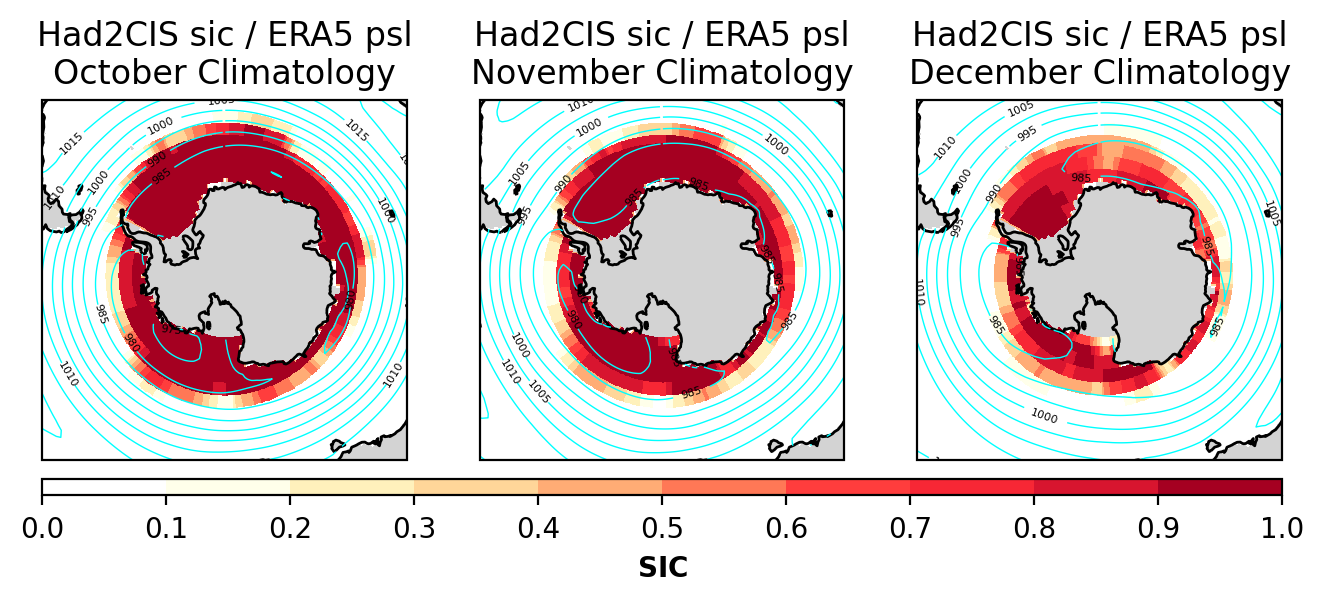

In [9]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(8,6),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})

for i in np.arange(3):
    month = i + 10

    sic_plot = add_sic(ax[i], sic_clim_Had2CIS, anom=False, month=month, year=None)
    #iceedge_plot = add_ice_edge(ax[i], sic_clim_Had2CIS, month=month)
    add_psl(ax[i], psl_clim_ERA5, month=month)

    set_extent(ax[i])
    ax[i].coastlines()
    ax[i].set_title(f"Had2CIS sic / ERA5 psl\n{monthdict[month]} Climatology")

sic_plot.set_clim([0., 1.])
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label="$\mathbf{SIC}$")

plt.show()

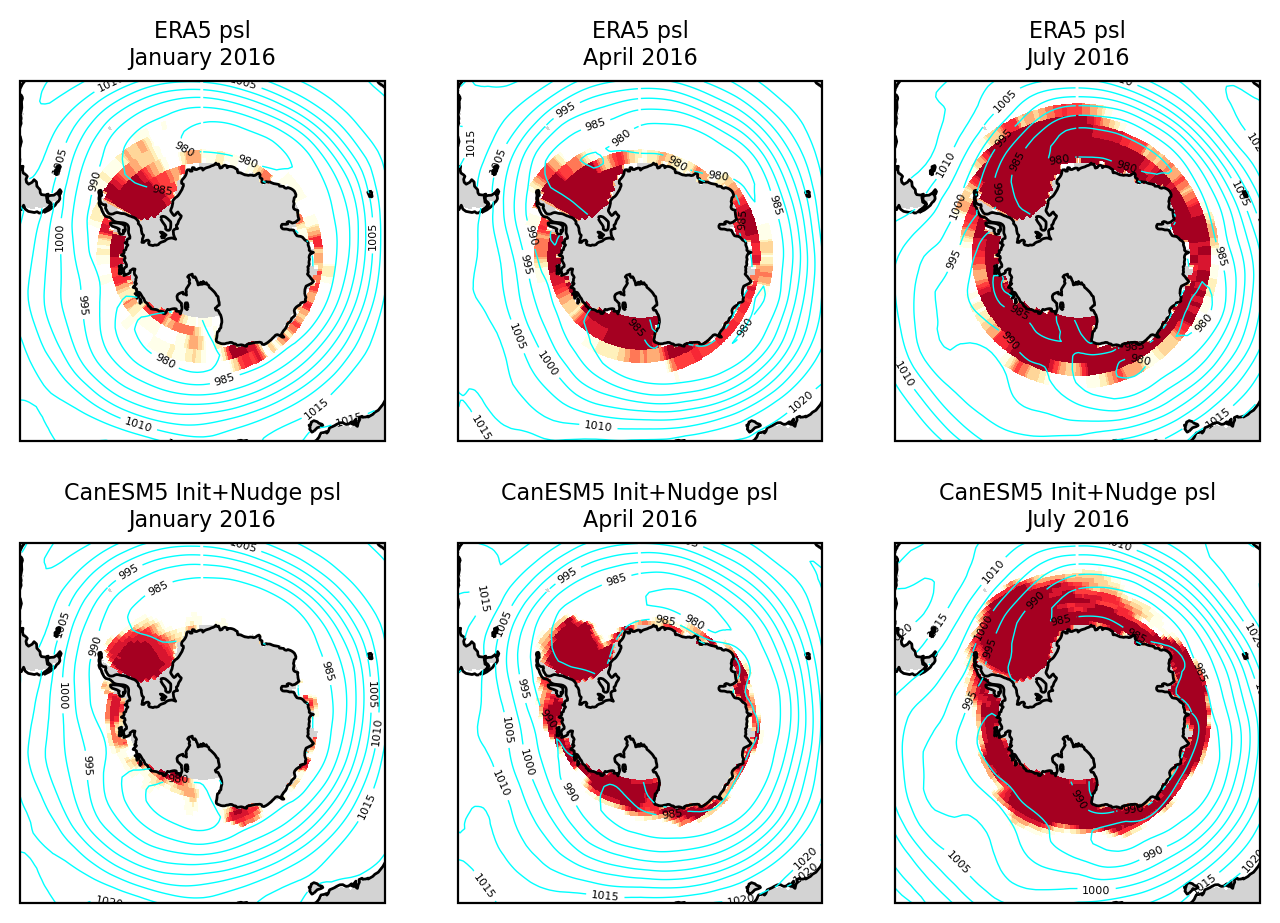

In [11]:
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(8,5.5),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})

for i in np.arange(3): # month
    for j in np.arange(2): # ERA5 or simulation
        month = 3*i + 1 # start in january

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        if j == 0:
            add_psl(ax[j][i], psl_ERA5, month=month, year=2016)
            add_sic(ax[j][i], sic_Had2CIS, anom=False, month=month, year=2016)
            ax[j][i].set_title(f"ERA5 psl\n{monthdict[month]} 2016", size=8)
        elif j == 1:
            add_psl(ax[j][i], psl_CanESM5_wn2016_init, month=month, year=2016)
            add_sic(ax[j][i], sic_CanESM5_wn2016_init, anom=False, month=month, year=2016)
            ax[j][i].set_title(f"CanESM5 Init+Nudge psl\n{monthdict[month]} 2016", size=8)

plt.show()